## Data cleaning on articles - Colab

In [1]:
# Importing necessary packages 

## General librariesimport pandas as pd
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
import datetime
import time
import seaborn as sns

## Machine Learning libraries
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from xgboost import XGBClassifier
from datetime import datetime
import datetime

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
gossipcop_fake= pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/gossipcop_fake.csv")

In [6]:
gossipcop_real= pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/gossipcop_real.csv")

In [7]:
politifact_fake= pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/politifact_fake.csv")

In [8]:
politifact_real= pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/politifact_real.csv")

### Data cleaning

In [9]:
gossipcop_fake['target']=False
gossipcop_real['target']=True
politifact_fake['target']=False
politifact_real['target']=True

In [10]:
gossipcop_fake['id'] = gossipcop_fake['id'].apply(lambda x: x.split('-')[1])
gossipcop_real['id'] = gossipcop_real['id'].apply(lambda x: x.split('-')[1])
gossipcop_fake['source'] = 'gossipcop'
gossipcop_real['source'] = 'gossipcop'

politifact_fake['id'] = politifact_fake['id'].apply(lambda x: x[10::])
politifact_real['id'] = politifact_real['id'].apply(lambda x: x[10::])
politifact_fake['source'] = 'politifact'
politifact_real['source'] = 'politifact'

In [11]:
df=pd.concat([gossipcop_fake,gossipcop_real,politifact_fake,politifact_real],axis=0)
df

,id,news_url,title,tweet_ids,target,source
0,2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,False,gossipcop
1,4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,False,gossipcop
2,941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,False,gossipcop
3,2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,False,gossipcop
4,5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,False,gossipcop
...,...,...,...,...,...,...
619,14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN,True,politifact
620,329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...,True,politifact
621,1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN,True,politifact
622,4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,True,politifact


In [12]:
columns = ['id','source','news_url','title','tweet_ids','target']
df=df[columns]
df.head()

,id,source,news_url,title,tweet_ids,target
0,2493749932,gossipcop,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,False
1,4580247171,gossipcop,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,False
2,941805037,gossipcop,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,False
3,2547891536,gossipcop,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,False
4,5476631226,gossipcop,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23196 entries, 0 to 623
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         23196 non-null  object
 1   source     23196 non-null  object
 2   news_url   22866 non-null  object
 3   title      23196 non-null  object
 4   tweet_ids  21695 non-null  object
 5   target     23196 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 1.1+ MB


In [14]:
import re
from re import split

df['tweet_ids'] = df['tweet_ids'].astype(str)
print(len(str(df['tweet_ids'].iloc[0])),type(df['tweet_ids'][0]))
print(str(df['tweet_ids'][0].tolist()))

df['tweet_ids'] = df['tweet_ids'].apply(lambda x: str(x).replace('\t',' '))

1865 <class 'pandas.core.series.Series'>
['284329075902926848\t284332744559968256\t284335412590297089\t284359918792880128\t284385385151332353\t284456388833452032\t284644878267318273\t284656558963564545\t284705391965794304\t284705391957401601\t284762425553723392\t284766089827721217\t284769766806257664\t284769769490620416\t284769775442337792\t284769772980301824\t284769778655186944\t284769777073917952\t284771913753042944\t284902943201837056\t284918939975303169\t285592266716884993\t285635421872979969\t285635516924301313\t285731324101287937\t295954533555793920\t296639632710459392\t296651276626825216\t700137152143699968\t700501642412560384\t700599457767890944\t700925213031141376\t757598980373045248\t757614017808437248\t757810204448743425\t757855454886293504\t818454872299163649\t818532208990371841\t818622382524997632\t818623644737871872\t824328059335692290\t840237926642536449\t840277988067430400\t840305556736872448\t840312641042104320\t840320383437877248\t840321378150670336\t84032544938960076

In [15]:
df

,id,source,news_url,title,tweet_ids,target
0,2493749932,gossipcop,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848 284332744559968256 28433541...,False
1,4580247171,gossipcop,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880 992897935418503169 99289952...,False
2,941805037,gossipcop,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696 853359576543920128 85335975...,False
3,2547891536,gossipcop,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981 988824206556172288 98882513...,False
4,5476631226,gossipcop,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131 955795063925301249 95579800...,False
...,...,...,...,...,...,...
619,14731,politifact,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,nan,True
620,329,politifact,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888 946743411100536832 94681610...,True
621,1576,politifact,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,nan,True
622,4720,politifact,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,True


In [16]:
df['tweet_ids'] = df['tweet_ids'].apply(lambda x: re.split(r' ', x))
df

,id,source,news_url,title,tweet_ids,target
0,2493749932,gossipcop,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,"[284329075902926848, 284332744559968256, 28433...",False
1,4580247171,gossipcop,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,"[992895508267130880, 992897935418503169, 99289...",False
2,941805037,gossipcop,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,"[853359353532829696, 853359576543920128, 85335...",False
3,2547891536,gossipcop,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,"[988821905196158981, 988824206556172288, 98882...",False
4,5476631226,gossipcop,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,"[955792793632432131, 955795063925301249, 95579...",False
...,...,...,...,...,...,...
619,14731,politifact,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,[nan],True
620,329,politifact,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,"[634287923135909888, 946743411100536832, 94681...",True
621,1576,politifact,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,[nan],True
622,4720,politifact,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,[188871706637647874],True


In [17]:
df['number_tweets']=df['tweet_ids'].apply(lambda x: len(x)).astype(int)
df

,id,source,news_url,title,tweet_ids,target,number_tweets
0,2493749932,gossipcop,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,"[284329075902926848, 284332744559968256, 28433...",False,97
1,4580247171,gossipcop,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,"[992895508267130880, 992897935418503169, 99289...",False,15
2,941805037,gossipcop,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,"[853359353532829696, 853359576543920128, 85335...",False,86
3,2547891536,gossipcop,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,"[988821905196158981, 988824206556172288, 98882...",False,14
4,5476631226,gossipcop,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,"[955792793632432131, 955795063925301249, 95579...",False,66
...,...,...,...,...,...,...,...
619,14731,politifact,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,[nan],True,1
620,329,politifact,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,"[634287923135909888, 946743411100536832, 94681...",True,182
621,1576,politifact,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,[nan],True,1
622,4720,politifact,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,[188871706637647874],True,1


In [18]:
df['news_url']=df['news_url'].apply(lambda x: 'http://'+str(x) if str(x)[0:4]!='http' else x)
df['news_url']

0      http://www.dailymail.co.uk/tvshowbiz/article-5...
1      http://hollywoodlife.com/2018/05/05/paris-jack...
2      http://variety.com/2017/biz/news/tax-march-don...
3      http://www.dailymail.co.uk/femail/article-3499...
4      http://variety.com/2018/film/news/list-2018-os...
                             ...                        
619    https://www.flake.senate.gov/public/index.cfm/...
620    https://web.archive.org/web/20080131000131/htt...
621           http://www.youtube.com/watch?v=4O8CxZ1OD58
622           http://www.youtube.com/watch?v=EhyMplwY6HY
623    https://web.archive.org/web/20071102131244/htt...
Name: news_url, Length: 23196, dtype: object

In [19]:
df.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/dataframe_with_list_tweets.csv")

### Web scraping

In [20]:
pip install newspaper3k

     |████████████████████████████████| 211 kB 4.2 MB/s 
     |████████████████████████████████| 87 kB 5.3 MB/s 
     |████████████████████████████████| 81 kB 7.2 MB/s 
     |████████████████████████████████| 7.4 MB 53.4 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=1d1e532638625df36788184c3eae262b8a41f4f49231bf55bbba0d23a0137534
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=49d69a0fb275781255b49a507bb7a24941b4259485dffab9c9b79a6d97b7050a
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=e25eb332c77510ff6358126356bb432d09c6b6bcb92e235b90da87de297c58fa
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [21]:
pip install nltk

ERROR: Operation cancelled by user


In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
from time import sleep
from tqdm import tqdm

In [ ]:
# to access your specific url column
import newspaper
from newspaper import Article
import sys as sys
import pandas as pd

body=[]
date=[]
keywords=[]

for link in tqdm(df['news_url'][:10000]): 
  try:
    article = Article(url= link)
    article.download()
    article.parse()
    successful = True
  except:
    successful = False
  if successful:
    body.append(article.text)
    date.append(article.publish_date)
    keywords.append(article.keywords)
  else: 
    body.append('error')
    date.append('error')
    keywords.append('error')


  0%|          | 11/10000 [00:11<3:31:04,  1.27s/it]

In [ ]:
body = pd.DataFrame(body)
publish_date = pd.DataFrame(date)
key_words = pd.DataFrame(keywords)

In [ ]:
body.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/body_10000.csv")
publish_date.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/publish_date_10000.csv")
key_words.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/key_words_10000.csv")

In [ ]:
# to access your specific url column
import newspaper
from newspaper import Article
import sys as sys
import pandas as pd

body_2=[]
date_2=[]
#keywords=[]

for link in tqdm(df['news_url'][10000:20000:]): 
  try:
    article = Article(url= link)
    article.download()
    article.parse()
    successful = True
  except:
    successful = False
  if successful:
    body_2.append(article.text)
    date_2.append(article.publish_date)
 #   keywords.append(article.keywords)
  else: 
    body_2.append('error')
    date_2.append('error')
  #  keywords.append('error')

In [ ]:
body_2 = pd.DataFrame(body_2)
publish_date_2 = pd.DataFrame(date_2)

In [ ]:
body_2.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/body_10000_20000.csv")
publish_date_2.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/publish_date_10000_20000.csv")

In [ ]:
# to access your specific url column
import newspaper
from newspaper import Article
import sys as sys
import pandas as pd

body_3=[]
date_3=[]
#keywords=[]

for link in tqdm(df['news_url'][20000::]): 
  try:
    article = Article(url= link)
    article.download()
    article.parse()
    successful = True
  except:
    successful = False
  if successful:
    body_3.append(article.text)
    date_3.append(article.publish_date)
 #   keywords.append(article.keywords)
  else: 
    body_3.append('error')
    date_3.append('error')
  #  keywords.append('error')

In [ ]:
body_3 = pd.DataFrame(body_3)
publish_date_3 = pd.DataFrame(date_3)

In [ ]:
body_3.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/body_20000.csv")
publish_date_3.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/publish_date_20000.csv")

### Merging datasets

In [2]:
df= pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/dataframe_with_list_tweets.csv")

In [8]:
body1 = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/body/body_10000.csv")
publish_date1 = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/publish_date/publish_date_10000.csv")
body2 = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/body/body_10000_20000.csv")
publish_date2 = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/publish_date/publish_date_10000_20000.csv")
body3 = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/body/body_20000.csv")
publish_date3 = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/publish_date/publish_date_20000.csv")


In [9]:
body1.columns=['id','body']
body2.columns=['id','body']
body3.columns=['id','body']
body2['id'] = body2['id'].apply(lambda x: x+10000)
body3['id'] = body3['id'].apply(lambda x: x+20000)
body1 = body1.set_index('id')
body2 = body2.set_index('id')
body3 = body3.set_index('id')
body = pd.concat([body1,body2,body3],axis=0)
body['body'] = body['body'].apply(lambda x : np.nan if x=='error' else x)

publish_date1.columns=['id','publish_date']
publish_date2.columns=['id','publish_date']
publish_date3.columns=['id','publish_date']
publish_date2['id'] = publish_date2['id'].apply(lambda x: x+10000)
publish_date3['id'] = publish_date3['id'].apply(lambda x: x+20000)
publish_date1 = publish_date1.set_index('id')
publish_date2 = publish_date2.set_index('id')
publish_date3 = publish_date3.set_index('id')
publish_date = pd.concat([publish_date1,publish_date2,publish_date3],axis=0)
publish_date['publish_date'] = publish_date['publish_date'].apply(lambda x : np.nan if x=='error' else x)

In [10]:
df = df.reset_index()
body = body.reset_index()
publish_date = publish_date.reset_index()
df2 = pd.concat([df, body,publish_date],axis=1).drop(columns=['index'])

In [11]:
df2.columns

Index(['level_0', 'Unnamed: 0', 'id', 'source', 'news_url', 'title',
       'tweet_ids', 'target', 'number_tweets', 'id', 'body', 'id',
       'publish_date'],
      dtype='object')

In [12]:
df2

,level_0,Unnamed: 0,id,source,news_url,title,tweet_ids,target,number_tweets,id,body,id,publish_date
0,0,0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,Did Miley Cyrus and Liam Hemsworth secretly ge...,"['284329075902926848', '284332744559968256', '...",False,97,0,Congratulations might be in order for Miley Cy...,0,2018-06-22 15:58:20+01:00
1,1,1,4580247171,gossipcop,http://hollywoodlife.com/2018/05/05/paris-jack...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,"['992895508267130880', '992897935418503169', '...",False,15,1,NaN,1,NaN
2,2,2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,Celebrities Join Tax March in Protest of Donal...,"['853359353532829696', '853359576543920128', '...",False,86,2,Thousands are taking the streets to protest Pr...,2,2017-04-15 21:25:01+00:00
3,3,3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,Cindy Crawford's daughter Kaia Gerber wears a ...,"['988821905196158981', '988824206556172288', '...",False,14,3,We'd venture to say that Cindy Crawford's daug...,3,2016-03-18 20:27:55+00:00
4,4,4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,Full List of 2018 Oscar Nominations – Variety,"['955792793632432131', '955795063925301249', '...",False,66,4,Oscar nominations for the 90th annual awards w...,4,2018-01-23 13:19:57+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23191,23191,619,14731,politifact,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,['nan'],True,1,23191,NaN,23191,NaN
23192,23192,620,329,politifact,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,"['634287923135909888', '946743411100536832', '...",True,182,23192,Remarks of Senator Barack Obama: The Past Vers...,23192,2008-01-30 00:00:00
23193,23193,621,1576,politifact,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,['nan'],True,1,23193,NaN,23193,NaN
23194,23194,622,4720,politifact,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,['188871706637647874'],True,1,23194,NaN,23194,NaN


In [ ]:
df2.columns = ['A', 'id', 'source', 'news_url', 'title', 'tweet_ids', 'target', 'number_tweets', 'id_1', 'body', 'id_2', 'publish_date']
df2 = df2.drop(columns=['id_1','id_2','A'])
new_cols = ['id', 'source', 'news_url', 'title', 'tweet_ids', 'number_tweets', 'body', 'publish_date', 'target']
df2 = df2[new_cols]
df2

,id,source,news_url,title,tweet_ids,number_tweets,body,publish_date,target
0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,Did Miley Cyrus and Liam Hemsworth secretly ge...,"['284329075902926848', '284332744559968256', '...",97,Congratulations might be in order for Miley Cy...,2018-06-22 15:58:20+01:00,False
1,4580247171,gossipcop,http://hollywoodlife.com/2018/05/05/paris-jack...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,"['992895508267130880', '992897935418503169', '...",15,NaN,NaN,False
2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,Celebrities Join Tax March in Protest of Donal...,"['853359353532829696', '853359576543920128', '...",86,Thousands are taking the streets to protest Pr...,2017-04-15 21:25:01+00:00,False
3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,Cindy Crawford's daughter Kaia Gerber wears a ...,"['988821905196158981', '988824206556172288', '...",14,We'd venture to say that Cindy Crawford's daug...,2016-03-18 20:27:55+00:00,False
4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,Full List of 2018 Oscar Nominations – Variety,"['955792793632432131', '955795063925301249', '...",66,Oscar nominations for the 90th annual awards w...,2018-01-23 13:19:57+00:00,False
...,...,...,...,...,...,...,...,...,...
23191,14731,politifact,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,['nan'],1,NaN,NaN,True
23192,329,politifact,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,"['634287923135909888', '946743411100536832', '...",182,Remarks of Senator Barack Obama: The Past Vers...,2008-01-30 00:00:00,True
23193,1576,politifact,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,['nan'],1,NaN,NaN,True
23194,4720,politifact,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,['188871706637647874'],1,NaN,NaN,True


In [ ]:
df2.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/dataframe_text_no_tweets.csv")

### Data cleaning - part II

In [ ]:
df2 = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/old/dataframe_text_no_tweets.csv")

In [ ]:
df2.head()

,Unnamed: 0,id,source,news_url,title,tweet_ids,number_tweets,body,publish_date,target
0,0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,Did Miley Cyrus and Liam Hemsworth secretly ge...,"['284329075902926848', '284332744559968256', '...",97,Congratulations might be in order for Miley Cy...,2018-06-22 15:58:20+01:00,False
1,1,4580247171,gossipcop,http://hollywoodlife.com/2018/05/05/paris-jack...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,"['992895508267130880', '992897935418503169', '...",15,NaN,NaN,False
2,2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,Celebrities Join Tax March in Protest of Donal...,"['853359353532829696', '853359576543920128', '...",86,Thousands are taking the streets to protest Pr...,2017-04-15 21:25:01+00:00,False
3,3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,Cindy Crawford's daughter Kaia Gerber wears a ...,"['988821905196158981', '988824206556172288', '...",14,We'd venture to say that Cindy Crawford's daug...,2016-03-18 20:27:55+00:00,False
4,4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,Full List of 2018 Oscar Nominations – Variety,"['955792793632432131', '955795063925301249', '...",66,Oscar nominations for the 90th annual awards w...,2018-01-23 13:19:57+00:00,False


In [ ]:
nan_url = df2[df2['body'].isna()]['news_url']

In [ ]:
print(len(nan_url.tolist()), len(df2['body'].tolist()))

4193 23196


In [ ]:
df2 = df2.dropna(subset = ['body'], axis=0)
df2.head()

,Unnamed: 0,id,source,news_url,title,tweet_ids,number_tweets,body,publish_date,target
0,0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,Did Miley Cyrus and Liam Hemsworth secretly ge...,"['284329075902926848', '284332744559968256', '...",97,Congratulations might be in order for Miley Cy...,2018-06-22 15:58:20+01:00,False
2,2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,Celebrities Join Tax March in Protest of Donal...,"['853359353532829696', '853359576543920128', '...",86,Thousands are taking the streets to protest Pr...,2017-04-15 21:25:01+00:00,False
3,3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,Cindy Crawford's daughter Kaia Gerber wears a ...,"['988821905196158981', '988824206556172288', '...",14,We'd venture to say that Cindy Crawford's daug...,2016-03-18 20:27:55+00:00,False
4,4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,Full List of 2018 Oscar Nominations – Variety,"['955792793632432131', '955795063925301249', '...",66,Oscar nominations for the 90th annual awards w...,2018-01-23 13:19:57+00:00,False
5,5,5189580095,gossipcop,http://www.townandcountrymag.com/society/tradi...,Here's What Really Happened When JFK Jr. Met P...,"['890253005299351552', '890401381814870016', '...",4,"During the summer of 1995, John F. Kennedy Jr....",2017-06-29 08:40:00,False


In [ ]:
df2 = df2.drop(columns=['Unnamed: 0'])
cols = ['id', 'news_url', 'title', 'tweet_ids', 'number_tweets',
       'body', 'publish_date']
print(len(df2[df2[cols].duplicated()==True]['id'].tolist()))
df2 = df2[df2[cols].duplicated()==False]
df2

1


In [ ]:
df2['target'] = df2['target'].astype(int)
df2.head()
# 0 if fake, #1 if real

,id,source,news_url,title,tweet_ids,number_tweets,body,publish_date,target
0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,Did Miley Cyrus and Liam Hemsworth secretly ge...,"['284329075902926848', '284332744559968256', '...",97,Congratulations might be in order for Miley Cy...,2018-06-22 15:58:20+01:00,0
2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,Celebrities Join Tax March in Protest of Donal...,"['853359353532829696', '853359576543920128', '...",86,Thousands are taking the streets to protest Pr...,2017-04-15 21:25:01+00:00,0
3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,Cindy Crawford's daughter Kaia Gerber wears a ...,"['988821905196158981', '988824206556172288', '...",14,We'd venture to say that Cindy Crawford's daug...,2016-03-18 20:27:55+00:00,0
4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,Full List of 2018 Oscar Nominations – Variety,"['955792793632432131', '955795063925301249', '...",66,Oscar nominations for the 90th annual awards w...,2018-01-23 13:19:57+00:00,0
5,5189580095,gossipcop,http://www.townandcountrymag.com/society/tradi...,Here's What Really Happened When JFK Jr. Met P...,"['890253005299351552', '890401381814870016', '...",4,"During the summer of 1995, John F. Kennedy Jr....",2017-06-29 08:40:00,0


In [ ]:
df2["source_url"] = df2['news_url'].apply(lambda x: x.split("/")[2].replace("www.","").replace("web.","").replace("select.","").split(".")[0])
cols = ['id', 'source','news_url', 'source_url', 'title', 'publish_date', 'body', 'tweet_ids', 'number_tweets','target']
df2 = df2[cols]
df2.head()

,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,dailymail,Did Miley Cyrus and Liam Hemsworth secretly ge...,2018-06-22 15:58:20+01:00,Congratulations might be in order for Miley Cy...,"['284329075902926848', '284332744559968256', '...",97,0
2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,variety,Celebrities Join Tax March in Protest of Donal...,2017-04-15 21:25:01+00:00,Thousands are taking the streets to protest Pr...,"['853359353532829696', '853359576543920128', '...",86,0
3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,dailymail,Cindy Crawford's daughter Kaia Gerber wears a ...,2016-03-18 20:27:55+00:00,We'd venture to say that Cindy Crawford's daug...,"['988821905196158981', '988824206556172288', '...",14,0
4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,variety,Full List of 2018 Oscar Nominations – Variety,2018-01-23 13:19:57+00:00,Oscar nominations for the 90th annual awards w...,"['955792793632432131', '955795063925301249', '...",66,0
5,5189580095,gossipcop,http://www.townandcountrymag.com/society/tradi...,townandcountrymag,Here's What Really Happened When JFK Jr. Met P...,2017-06-29 08:40:00,"During the summer of 1995, John F. Kennedy Jr....","['890253005299351552', '890401381814870016', '...",4,0


In [ ]:
df2['source_url'].unique().tolist()

['dailymail',
 'variety',
 'townandcountrymag',
 'foxnews',
 'eonline',
 'inquisitr',
 'huffingtonpost',
 'yournewswire',
 'marieclaire',
 'imdb',
 'hollywoodlife',
 'radaronline',
 'politico',
 'en',
 'newidea',
 'usmagazine',
 'hollywoodreporter',
 'justjared',
 'ibtimes',
 'yourtango',
 'forum',
 'express',
 'thewrap',
 'usatoday',
 'popsugar',
 'time',
 'celebritynetworth',
 'celebitchy',
 'ok',
 'tgbyn',
 'celebdirtylaundry',
 'marriedbiography',
 'nationalenquirer',
 'elitedaily',
 'harpersbazaar',
 'goodreads',
 'heavy',
 'people',
 'cnn',
 'thecut',
 'abcnews',
 'aol',
 'health',
 'pornhub',
 'uznayvse',
 'deadline',
 'news',
 'esquire',
 'dailycaller',
 'closerweekly',
 'bankrate',
 'bustle',
 'lifeandstylemag',
 'billboard',
 'j-14',
 'etonline',
 'pinterest',
 'theatlantic',
 'selftanning',
 'nytimes',
 'independent',
 'nbcsports',
 'thehollywoodgossip',
 'vanityfair',
 'thebuzz',
 'torontosun',
 'tvinsider',
 'nme',
 'cosmopolitan',
 'intouchweekly',
 'theguardian',
 'metro

In [ ]:
df2['publish_date'] = df2['publish_date'].apply(lambda x: str(x)[0:10])
df2['publish_date'] = pd.to_datetime(df2['publish_date'],errors='coerce')
df2

,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,dailymail,Did Miley Cyrus and Liam Hemsworth secretly ge...,2018-06-22,Congratulations might be in order for Miley Cy...,"['284329075902926848', '284332744559968256', '...",97,0
2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,variety,Celebrities Join Tax March in Protest of Donal...,2017-04-15,Thousands are taking the streets to protest Pr...,"['853359353532829696', '853359576543920128', '...",86,0
3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,dailymail,Cindy Crawford's daughter Kaia Gerber wears a ...,2016-03-18,We'd venture to say that Cindy Crawford's daug...,"['988821905196158981', '988824206556172288', '...",14,0
4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,variety,Full List of 2018 Oscar Nominations – Variety,2018-01-23,Oscar nominations for the 90th annual awards w...,"['955792793632432131', '955795063925301249', '...",66,0
5,5189580095,gossipcop,http://www.townandcountrymag.com/society/tradi...,townandcountrymag,Here's What Really Happened When JFK Jr. Met P...,2017-06-29,"During the summer of 1995, John F. Kennedy Jr....","['890253005299351552', '890401381814870016', '...",4,0
...,...,...,...,...,...,...,...,...,...,...
23188,1204,politifact,http://select.nytimes.com/gst/abstract.html?re...,nytimes,IMPEACHMENT HINT STIRS HOUSE CLASH; Democratic...,1935-07-24,Full text is unavailable for this digitized ar...,['nan'],1,1
23189,6931,politifact,http://www.politifact.com/truth-o-meter/promis...,politifact,The Obameter: Introduce a comprehensive immigr...,NaT,Immigration reform was a major component of Pr...,"['21096374968', '21096771824', '94134529928765...",137,1
23190,13619,politifact,http://www.cnn.com/2017/01/05/politics/border-...,cnn,"Trump asking Congress, not Mexico, to pay for ...",2017-01-05,Story highlights The Trump transition team say...,"['817357495047979008', '817357627566985217', '...",976,1
23192,329,politifact,https://web.archive.org/web/20080131000131/htt...,archive,Change We Can Believe In,2008-01-30,Remarks of Senator Barack Obama: The Past Vers...,"['634287923135909888', '946743411100536832', '...",182,1


In [ ]:
df2.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/dataframe_text_no_tweets_v2.csv")

### Text cleaning

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/dataframe_text_no_tweets_v2.csv")

In [ ]:
df = df[df['source']=='politifact']

In [ ]:
import os

In [ ]:
text = df['title']

# change to lowercase
text_lowercase = text.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text_no_punct = text_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokenized = text_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text_no_stop = text_tokenized.apply(remove_stopwords)



# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text_stemmed = text_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text_detokenized = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=df['title'].index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


trump         83
obama         61
break         55
presid        51
transcript    48
us            42
senat         37
clinton       37
say           36
news          35
debat         27
remark        27
democrat      25
new           21
hillari       21
week          20
video         20
offic         18
donald        18
presidenti    17
mccain        17
hous          16
call          16
vote          15
arrest        15
congress      14
latest        14
state         14
nation        14
bill          14
twitter       14
skype         13
outlook       13
bing          13
gun           13
barack        12
white         12
paul          12
health        12
polit         12
full          11
report        11
american      11
school        11
statist       11
tax           11
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7fd27de44c90>,
 [Text(0, 0, '1'),
  Text(0, 0, '6'),
  Text(0, 0, '11'),
  Text(0, 0, '16'),
  Text(0, 0, '21'),
  Text(0, 0, '26'),
  Text(0, 0, '31'),
  Text(0, 0, '36'),
  Text(0, 0, '41'),
  Text(0, 0, '46')])

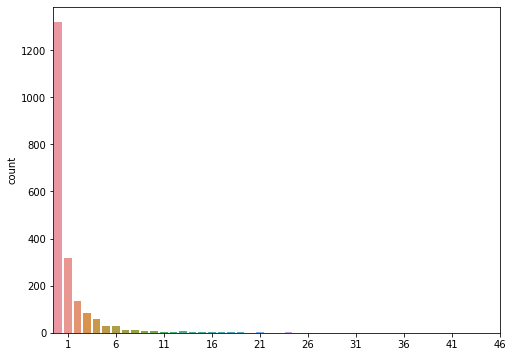

In [ ]:
# visualisation of frequent words

frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 10])

#plot the most frequent words
plt.figure(figsize=(8,6))

ax = sns.countplot(frequencies)
plt.xticks(np.arange(1, 50, step=5), np.arange(1, 50, step=5))



In [ ]:
# create dataframe with most frequent values

countvec2 = CountVectorizer(min_df=0.01)
sparse_dtm2 = countvec2.fit_transform(text_detokenized)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=df['title'].index)
dtm2.sum().sort_values(ascending=False) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


trump         83
obama         61
break         55
presid        51
transcript    48
              ..
one            7
page           7
pelosi         7
polic          7
york           7
Length: 99, dtype: int64

In [ ]:
dtm2

,act,action,america,american,arrest,attack,barack,bill,bing,break,call,campaign,care,chang,children,clinton,cnn,congress,data,day,dead,debat,democrat,donald,elect,email,energi,feder,first,florida,fox,full,gop,gun,health,hillari,hous,immigr,interview,issu,...,pelosi,plan,polic,polit,presid,presidenti,press,protest,public,rate,reform,remark,rep,report,republican,romney,say,school,senat,show,skype,state,statement,statist,tax,texa,th,transcript,trump,twitter,unit,updat,us,video,vote,war,week,white,year,york
18314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
18317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
19000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_total = df.merge(dtm2, on = df['title'].index, how = 'inner')
df_total

,key_0,Unnamed: 0,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target,act,action,america,american,arrest,attack,barack,bill,bing,break,call,campaign,care,chang,children,clinton,cnn,congress,data,day,dead,debat,democrat,donald,elect,email,energi,feder,...,pelosi,plan,polic,polit,presid,presidenti,press,protest,public,rate,reform,remark,rep,report,republican,romney,say,school,senat,show,skype,state,statement,statist,tax,texa,th,transcript,trump,twitter,unit,updat,us,video,vote,war,week,white,year,york
0,18314,22142,14745,politifact,http://www.nscdscamps.org/blog/category/parent...,nscdscamps,UPDATE: Second Roy Moore Accuser Works For Mic...,NaN,Read original article here\n\nLiberals sure ar...,"['929405740732870656', '929439450400264192', '...",220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,18315,22143,14355,politifact,https://howafrica.com/oscar-pistorius-attempts...,howafrica,Oscar Pistorius Attempts To Commit Suicide,2016-08-07,The former Paralympic athlete reportedly tried...,"['886941526458347521', '887011300278194176', '...",22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18316,22144,15371,politifact,http://washingtonsources.org/trump-votes-for-d...,washingtonsources,Trump Votes For Death Penalty For Being Gay,NaN,"Meet Julia Marino, Team USA's First Winter Oly...","['915205698212040704', '915242076681506816', '...",550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,18317,22145,14404,politifact,http://gloria.tv/video/yRrtUtTCfPga6cq2VDJPcgQe4,gloria,Putin says: ‘Pope Francis Is Not A Man Of God’...,NaN,aderito Report\n\nReport Change comment\n\nRem...,"['893290900637483009', '893290950700802048', '...",509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18318,22146,13919,politifact,http://blogs.trendolizer.com/2015/01/new-york-...,blogs,New York Man Wanted For Infecting 240 Men And ...,NaN,About Trendolizer™\n\nTrendolizer™ (patent pen...,['nan'],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,18997,23188,1204,politifact,http://select.nytimes.com/gst/abstract.html?re...,nytimes,IMPEACHMENT HINT STIRS HOUSE CLASH; Democratic...,1935-07-24,Full text is unavailable for this digitized ar...,['nan'],1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
684,18998,23189,6931,politifact,http://www.politifact.com/truth-o-meter/promis...,politifact,The Obameter: Introduce a comprehensive immigr...,NaN,Immigration reform was a major component of Pr...,"['21096374968', '21096771824', '94134529928765...",137,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
685,18999,23190,13619,politifact,http://www.cnn.com/2017/01/05/politics/border-...,cnn,"Trump asking Congress, not Mexico, to pay for ...",2017-01-05,Story highlights The Trump transition team say...,"['817357495047979008', '817357627566985217', '...",976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
686,19000,23192,329,politifact,https://web.archive.org/web/20080131000131

In [ ]:
df_total = df_total.set_index('key_0').drop(columns=['Unnamed: 0'])

In [ ]:
df_total

,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target,act,action,america,american,arrest,attack,barack,bill,bing,break,call,campaign,care,chang,children,clinton,cnn,congress,data,day,dead,debat,democrat,donald,elect,email,energi,feder,first,florida,...,pelosi,plan,polic,polit,presid,presidenti,press,protest,public,rate,reform,remark,rep,report,republican,romney,say,school,senat,show,skype,state,statement,statist,tax,texa,th,transcript,trump,twitter,unit,updat,us,video,vote,war,week,white,year,york
key_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18314,14745,politifact,http://www.nscdscamps.org/blog/category/parent...,nscdscamps,UPDATE: Second Roy Moore Accuser Works For Mic...,NaN,Read original article here\n\nLiberals sure ar...,"['929405740732870656', '929439450400264192', '...",220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18315,14355,politifact,https://howafrica.com/oscar-pistorius-attempts...,howafrica,Oscar Pistorius Attempts To Commit Suicide,2016-08-07,The former Paralympic athlete reportedly tried...,"['886941526458347521', '887011300278194176', '...",22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18316,15371,politifact,http://washingtonsources.org/trump-votes-for-d...,washingtonsources,Trump Votes For Death Penalty For Being Gay,NaN,"Meet Julia Marino, Team USA's First Winter Oly...","['915205698212040704', '915242076681506816', '...",550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
18317,14404,politifact,http://gloria.tv/video/yRrtUtTCfPga6cq2VDJPcgQe4,gloria,Putin says: ‘Pope Francis Is Not A Man Of God’...,NaN,aderito Report\n\nReport Change comment\n\nRem...,"['893290900637483009', '893290950700802048', '...",509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18318,13919,politifact,http://blogs.trendolizer.com/2015/01/new-york-...,blogs,New York Man Wanted For Infecting 240 Men And ...,NaN,About Trendolizer™\n\nTrendolizer™ (patent pen...,['nan'],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18997,1204,politifact,http://select.nytimes.com/gst/abstract.html?re...,nytimes,IMPEACHMENT HINT STIRS HOUSE CLASH; Democratic...,1935-07-24,Full text is unavailable for this digitized ar...,['nan'],1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18998,6931,politifact,http://www.politifact.com/truth-o-meter/promis...,politifact,The Obameter: Introduce a comprehensive immigr...,NaN,Immigration reform was a major component of Pr...,"['21096374968', '21096771824', '94134529928765...",137,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18999,13619,politifact,http://www.cnn.com/2017/01/05/politics/border-...,cnn,"Trump asking Congress, not Mexico, to pay for ...",2017-01-05,Story highlights The Trump transition team say...,"['817357495047979008', '817357627566985217', '...",976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_total.to_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/politifact_title_bagofwords.csv")

## Assignment I : data sources comparision & bag of words for title and body

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/243/FakeNewsNet/dataset/dataframe_text_no_tweets_v2.csv")

In [ ]:
df_fake = df[df['target'] == 0] # 0 if fake and 1 if real
df_real = df[df['target'] == 1]

df_fake_pol = df[(df['target'] == 0) & (df['source'] == 'politifact')]
df_real_pol = df[(df['target'] == 1) & (df['source'] == 'politifact')]
df_fake_gos = df[(df['target'] == 0) & (df['source'] == 'gossipcop')] 
df_real_gos = df[(df['target'] == 1) & (df['source'] == 'gossipcop')]

#### Source of the data

In [ ]:
df_fake_source = pd.DataFrame(df_fake['source_url'])
df_fake_source = round(df_fake_source['source_url'].value_counts(normalize = True)*100,2)
df_fake_source = df_fake_source.reset_index()
df_fake_source.columns = ['news source', '%']

df_real_source = pd.DataFrame(df_real['source_url'])
df_real_source = round(df_real_source['source_url'].value_counts(normalize = True)*100,2)
df_real_source = df_real_source.reset_index()
df_real_source.columns = ['news source', '%']

df_fake_pol_source = pd.DataFrame(df_fake_pol['source_url'])
df_fake_pol_source = round(df_fake_pol_source['source_url'].value_counts(normalize = True)*100,2)
df_fake_pol_source = df_fake_pol_source.reset_index()
df_fake_pol_source.columns = ['news source', '%']

df_real_pol_source = pd.DataFrame(df_real_pol['source_url'])
df_real_pol_source = round(df_real_pol_source['source_url'].value_counts(normalize = True)*100,2)
df_real_pol_source = df_real_pol_source.reset_index()
df_real_pol_source.columns = ['news source', '%']

df_fake_gos_source = pd.DataFrame(df_fake_gos['source_url'])
df_fake_gos_source = round(df_fake_gos_source['source_url'].value_counts(normalize = True)*100,2)
df_fake_gos_source = df_fake_gos_source.reset_index()
df_fake_gos_source.columns = ['news source', '%']

df_real_gos_source = pd.DataFrame(df_real_gos['source_url'])
df_real_gos_source = round(df_real_gos_source['source_url'].value_counts(normalize = True)*100,2)
df_real_gos_source = df_real_gos_source.reset_index()
df_real_gos_source.columns = ['news source', '%']

In [ ]:
df_real_gos_source.head()

,news source,%
0,people,11.11
1,dailymail,5.45
2,en,4.76
3,etonline,4.15
4,usmagazine,3.98


In [ ]:
df_fake_source.to_csv("/content/gdrive/My Drive/243/Assignment/Assignment_for_Professors/data/dataset_source_fake.csv")
df_real_source.to_csv("/content/gdrive/My Drive/243/Assignment/Assignment_for_Professors/data/dataset_source_real.csv")
df_fake_gos_source.to_csv("/content/gdrive/My Drive/243/Assignment/Assignment_for_Professors/data/dataset_source_gossip_fake.csv")
df_real_gos_source.to_csv("/content/gdrive/My Drive/243/Assignment/Assignment_for_Professors/data/dataset_source_gossip_real.csv")
df_fake_pol_source.to_csv("/content/gdrive/My Drive/243/Assignment/Assignment_for_Professors/data/dataset_source_politics_fake.csv")
df_real_pol_source.to_csv("/content/gdrive/My Drive/243/Assignment/Assignment_for_Professors/data/dataset_source_politics_real.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


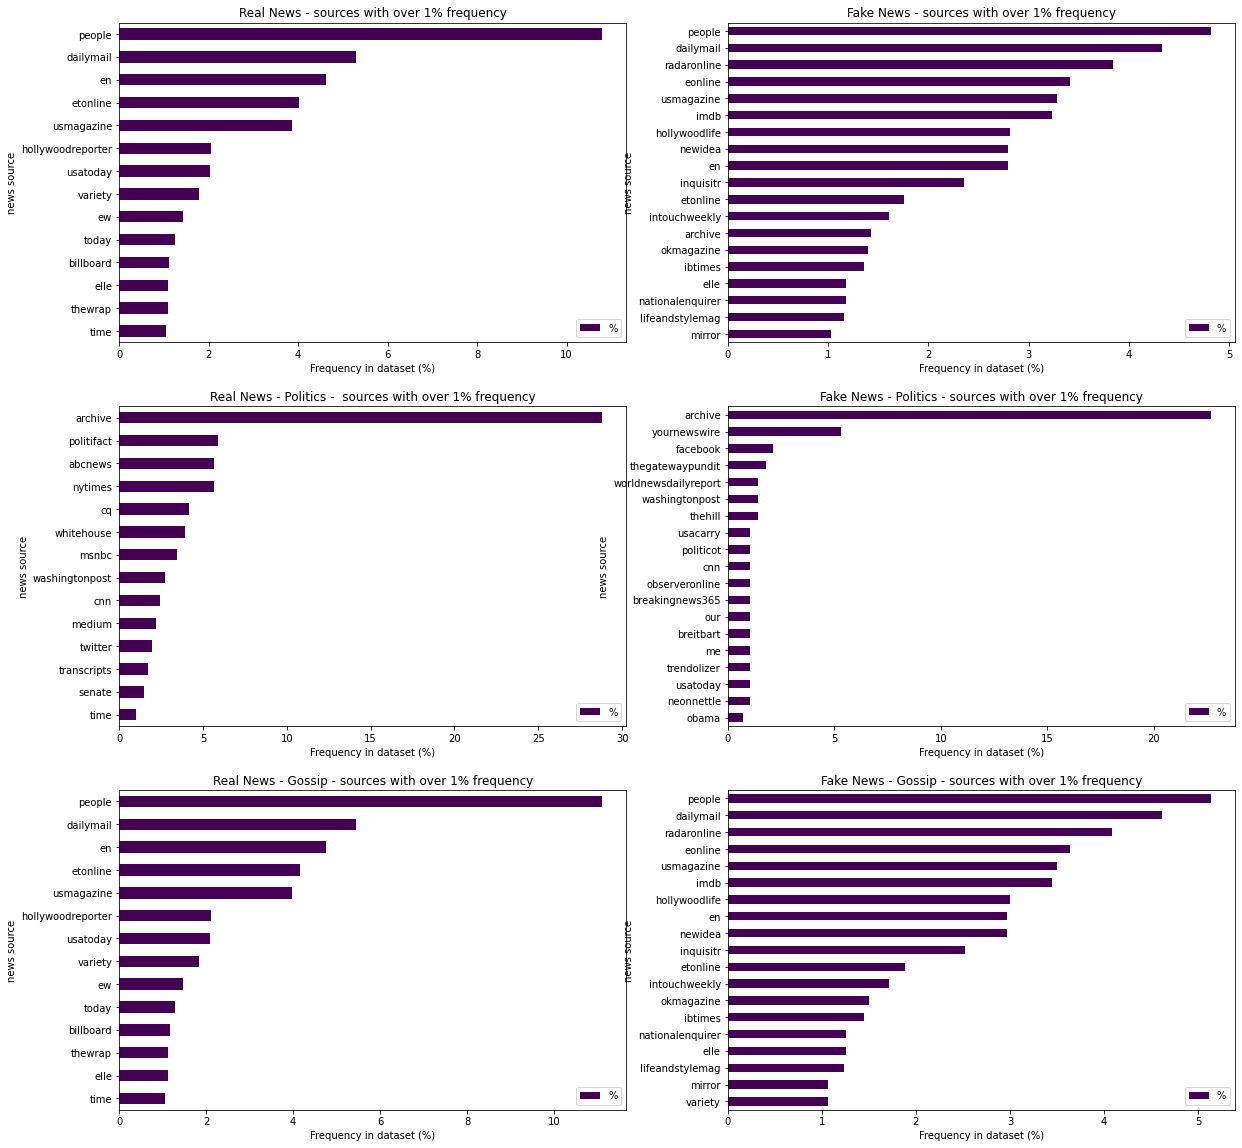

In [ ]:
# visualization
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

axes[0,0].title.set_text('Real News - sources with over 1% frequency')
axes[0,1].title.set_text('Fake News - sources with over 1% frequency')
axes[1,0].title.set_text('Real News - Politics -  sources with over 1% frequency')
axes[1,1].title.set_text('Fake News - Politics - sources with over 1% frequency')
axes[2,0].title.set_text('Real News - Gossip - sources with over 1% frequency')
axes[2,1].title.set_text('Fake News - Gossip - sources with over 1% frequency')

axes[0,0].set_ylabel('news source')
axes[0,1].set_ylabel('news source')
axes[1,0].set_ylabel('news source')
axes[1,1].set_ylabel('news source')
axes[2,0].set_ylabel('news source')
axes[2,1].set_ylabel('news source')

axes[0,0].set_xlabel('Frequency in dataset (%)')
axes[0,1].set_xlabel('Frequency in dataset (%)')
axes[1,0].set_xlabel('Frequency in dataset (%)')
axes[1,1].set_xlabel('Frequency in dataset (%)')
axes[2,0].set_xlabel('Frequency in dataset (%)')
axes[2,1].set_xlabel('Frequency in dataset (%)')

df_fake_source[df_fake_source['%']>1].sort_values(by= '%',ascending=True).plot.barh(x ='news source', y='%',  cmap = 'viridis', ax=axes[0,1])
df_real_source[df_real_source['%']>1].sort_values(by= '%',ascending=True).plot.barh(x ='news source', y='%',  cmap = 'viridis' , ax=axes[0,0])
df_fake_pol_source[df_fake_source['%']>1].sort_values(by= '%',ascending=True).plot.barh(x ='news source', y='%', cmap = 'viridis', ax=axes[1,1])
df_real_pol_source[df_real_source['%']>1].sort_values(by= '%',ascending=True).plot.barh(x ='news source', y='%', cmap = 'viridis' , ax=axes[1,0])
df_fake_gos_source[df_fake_source['%']>1].sort_values(by= '%',ascending=True).plot.barh(x ='news source', y='%', cmap = 'viridis', ax=axes[2,1])
df_real_gos_source[df_real_source['%']>1].sort_values(by= '%',ascending=True).plot.barh(x ='news source', y='%', cmap = 'viridis' , ax=axes[2,0])

#### Bag of words for report

##### Fake news

In [ ]:
import os

text1 = df_fake['title']
text2 = df_fake_pol['title'] # fake politics
text3 = df_fake_gos['title'] # fake gossips

# change to lowercase
text1_lowercase = text1.str.lower()
text2_lowercase = text2.str.lower()
text3_lowercase = text3.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text1_no_punct = text1_lowercase.apply(remove_punctuation)
text2_no_punct = text2_lowercase.apply(remove_punctuation)
text3_no_punct = text3_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text1_no_digit = text1_no_punct.apply(remove_digit)
text2_no_digit = text2_no_punct.apply(remove_digit)
text3_no_digit = text3_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text1_tokenized = text1_no_digit.apply(word_tokenize)
text2_tokenized = text2_no_digit.apply(word_tokenize)
text3_tokenized = text3_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text1_no_stop = text1_tokenized.apply(remove_stopwords)
text2_no_stop = text2_tokenized.apply(remove_stopwords)
text3_no_stop = text3_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text1_stemmed = text1_no_stop.apply(stemmer)
text2_stemmed = text2_no_stop.apply(stemmer)
text3_stemmed = text3_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text1_fake_title_detokenized = text1_stemmed.apply(TreebankWordDetokenizer().detokenize)
text2_fake_title_detokenized = text2_stemmed.apply(TreebankWordDetokenizer().detokenize)
text3_fake_title_detokenized = text3_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df=0.03)
countvec2 = CountVectorizer(min_df=0.03)
countvec3 = CountVectorizer(min_df=0.03)

sparse_dtm_fake_title1 = countvec1.fit_transform(text1_fake_title_detokenized)
sparse_dtm_fake_title2 = countvec2.fit_transform(text2_fake_title_detokenized)
sparse_dtm_fake_title3 = countvec3.fit_transform(text3_fake_title_detokenized)

dtm_fake_title1 = pd.DataFrame(sparse_dtm_fake_title1.toarray(), columns=countvec1.get_feature_names(), index=df_fake['title'].index)
dtm_fake_title2 = pd.DataFrame(sparse_dtm_fake_title2.toarray(), columns=countvec2.get_feature_names(), index=df_fake_pol['title'].index)
dtm_fake_title3 = pd.DataFrame(sparse_dtm_fake_title3.toarray(), columns=countvec3.get_feature_names(), index=df_fake_gos['title'].index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
frequencies_fake_title1 = dtm_fake_title1.sum().sort_values(ascending=False)
frequencies_fake_title1 = pd.DataFrame(dtm_fake_title1.sum().sort_values(ascending=False))
frequencies_fake_title1.columns = ['%']

frequencies_fake_title2 = dtm_fake_title2.sum().sort_values(ascending=False)
frequencies_fake_title2 = pd.DataFrame(dtm_fake_title2.sum().sort_values(ascending=False))
frequencies_fake_title2.columns = ['%']

frequencies_fake_title3 = dtm_fake_title3.sum().sort_values(ascending=False)
frequencies_fake_title3 = pd.DataFrame(dtm_fake_title3.sum().sort_values(ascending=False))
frequencies_fake_title3.columns = ['%']

In [ ]:
frequencies_fake_title1

,%
jennif,387
kardashian,382
brad,322
pitt,299
jenner,288
justin,278
kim,236
aniston,226
angelina,226
joli,215


In [ ]:
import os

text1 = df_fake['body']
text2 = df_fake_pol['body'] # fake politics
text3 = df_fake_gos['body'] # fake gossips

# change to lowercase
text1_lowercase = text1.str.lower()
text2_lowercase = text2.str.lower()
text3_lowercase = text3.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text1_no_punct = text1_lowercase.apply(remove_punctuation)
text2_no_punct = text2_lowercase.apply(remove_punctuation)
text3_no_punct = text3_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text1_no_digit = text1_no_punct.apply(remove_digit)
text2_no_digit = text2_no_punct.apply(remove_digit)
text3_no_digit = text3_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text1_tokenized = text1_no_digit.apply(word_tokenize)
text2_tokenized = text2_no_digit.apply(word_tokenize)
text3_tokenized = text3_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text1_no_stop = text1_tokenized.apply(remove_stopwords)
text2_no_stop = text2_tokenized.apply(remove_stopwords)
text3_no_stop = text3_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text1_stemmed = text1_no_stop.apply(stemmer)
text2_stemmed = text2_no_stop.apply(stemmer)
text3_stemmed = text3_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text1_fake_body_detokenized = text1_stemmed.apply(TreebankWordDetokenizer().detokenize)
text2_fake_body_detokenized = text2_stemmed.apply(TreebankWordDetokenizer().detokenize)
text3_fake_body_detokenized = text3_stemmed.apply(TreebankWordDetokenizer().detokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df=0.30)
countvec2 = CountVectorizer(min_df=0.30)
countvec3 = CountVectorizer(min_df=0.30)

sparse_dtm_fake_body1 = countvec1.fit_transform(text1_fake_body_detokenized)
dtm_fake_body1 = pd.DataFrame(sparse_dtm_fake_body1.toarray(), columns=countvec1.get_feature_names(), index=df_fake['body'].index)

sparse_dtm_fake_body2 = countvec2.fit_transform(text2_fake_body_detokenized)
dtm_fake_body2 = pd.DataFrame(sparse_dtm_fake_body2.toarray(), columns=countvec2.get_feature_names(), index=df_fake_pol['body'].index)

sparse_dtm_fake_body3 = countvec3.fit_transform(text3_fake_body_detokenized)
dtm_fake_body3 = pd.DataFrame(sparse_dtm_fake_body3.toarray(), columns=countvec3.get_feature_names(), index=df_fake_gos['body'].index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
frequencies_fake_body1 = dtm_fake_body1.sum().sort_values(ascending=False)
frequencies_fake_body1 = pd.DataFrame(dtm_fake_body1.sum().sort_values(ascending=False))
frequencies_fake_body1.columns = ['%']

frequencies_fake_body2 = dtm_fake_body2.sum().sort_values(ascending=False)
frequencies_fake_body2 = pd.DataFrame(dtm_fake_body2.sum().sort_values(ascending=False))
frequencies_fake_body2.columns = ['%']

frequencies_fake_body3 = dtm_fake_body3.sum().sort_values(ascending=False)
frequencies_fake_body3 = pd.DataFrame(dtm_fake_body3.sum().sort_values(ascending=False))
frequencies_fake_body3.columns = ['%']

In [ ]:
frequencies_fake_body1

,%
time,6669
said,6549
year,6350
one,5963
like,5490
new,5321
also,5157
say,4746
get,4626
show,4556


##### Real news

In [ ]:
import os

text1 = df_real['title']
text2 = df_real_pol['title'] # real politics
text3 = df_real_gos['title'] # real gossips

# change to lowercase
text1_lowercase = text1.str.lower()
text2_lowercase = text2.str.lower()
text3_lowercase = text3.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text1_no_punct = text1_lowercase.apply(remove_punctuation)
text2_no_punct = text2_lowercase.apply(remove_punctuation)
text3_no_punct = text3_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text1_no_digit = text1_no_punct.apply(remove_digit)
text2_no_digit = text2_no_punct.apply(remove_digit)
text3_no_digit = text3_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text1_tokenized = text1_no_digit.apply(word_tokenize)
text2_tokenized = text2_no_digit.apply(word_tokenize)
text3_tokenized = text3_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text1_no_stop = text1_tokenized.apply(remove_stopwords)
text2_no_stop = text2_tokenized.apply(remove_stopwords)
text3_no_stop = text3_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text1_stemmed = text1_no_stop.apply(stemmer)
text2_stemmed = text2_no_stop.apply(stemmer)
text3_stemmed = text3_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text1_real_title_detokenized = text1_stemmed.apply(TreebankWordDetokenizer().detokenize)
text2_real_title_detokenized = text2_stemmed.apply(TreebankWordDetokenizer().detokenize)
text3_real_title_detokenized = text3_stemmed.apply(TreebankWordDetokenizer().detokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df=0.03)
countvec2 = CountVectorizer(min_df=0.03)
countvec3 = CountVectorizer(min_df=0.03)

sparse_dtm_real_title1 = countvec1.fit_transform(text1_real_title_detokenized)
dtm_real_title1 = pd.DataFrame(sparse_dtm_real_title1.toarray(), columns=countvec1.get_feature_names(), index=df_real['title'].index)

sparse_dtm_real_title2 = countvec2.fit_transform(text2_real_title_detokenized)
dtm_real_title2 = pd.DataFrame(sparse_dtm_real_title2.toarray(), columns=countvec2.get_feature_names(), index=df_real_pol['title'].index)

sparse_dtm_real_title3 = countvec3.fit_transform(text3_real_title_detokenized)
dtm_real_title3 = pd.DataFrame(sparse_dtm_real_title3.toarray(), columns=countvec3.get_feature_names(), index=df_real_gos['title'].index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
frequencies_real_title1 = dtm_real_title1.sum().sort_values(ascending=False)
frequencies_real_title1 = pd.DataFrame(dtm_real_title1.sum().sort_values(ascending=False))
frequencies_real_title1.columns = ['%']

frequencies_real_title2 = dtm_real_title2.sum().sort_values(ascending=False)
frequencies_real_title2 = pd.DataFrame(dtm_real_title2.sum().sort_values(ascending=False))
frequencies_real_title2.columns = ['%']

frequencies_real_title3 = dtm_real_title3.sum().sort_values(ascending=False)
frequencies_real_title3 = pd.DataFrame(dtm_real_title3.sum().sort_values(ascending=False))
frequencies_real_title3.columns = ['%']

In [ ]:
frequencies_real_title1

,%
new,690
star,687
kardashian,615
season,568
award,543
say,522
reveal,514
show,439


In [ ]:
import os

text1 = df_real['body']
text2 = df_real_pol['body'] # real politics
text3 = df_real_gos['body'] # real gossips

# change to lowercase
text1_lowercase = text1.str.lower()
text2_lowercase = text2.str.lower()
text3_lowercase = text3.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text1_no_punct = text1_lowercase.apply(remove_punctuation)
text2_no_punct = text2_lowercase.apply(remove_punctuation)
text3_no_punct = text3_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text1_no_digit = text1_no_punct.apply(remove_digit)
text2_no_digit = text2_no_punct.apply(remove_digit)
text3_no_digit = text3_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text1_tokenized = text1_no_digit.apply(word_tokenize)
text2_tokenized = text2_no_digit.apply(word_tokenize)
text3_tokenized = text3_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text1_no_stop = text1_tokenized.apply(remove_stopwords)
text2_no_stop = text2_tokenized.apply(remove_stopwords)
text3_no_stop = text3_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text1_stemmed = text1_no_stop.apply(stemmer)
text2_stemmed = text2_no_stop.apply(stemmer)
text3_stemmed = text3_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text1_real_body_detokenized = text1_stemmed.apply(TreebankWordDetokenizer().detokenize)
text2_real_body_detokenized = text2_stemmed.apply(TreebankWordDetokenizer().detokenize)
text3_real_body_detokenized = text3_stemmed.apply(TreebankWordDetokenizer().detokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df=0.3)
countvec2 = CountVectorizer(min_df=0.4)
countvec3 = CountVectorizer(min_df=0.3)

sparse_dtm_real_body1 = countvec1.fit_transform(text1_real_body_detokenized)
dtm_real_body1 = pd.DataFrame(sparse_dtm_real_body1.toarray(), columns=countvec1.get_feature_names(), index=df_real['body'].index)


sparse_dtm_real_body2 = countvec2.fit_transform(text2_real_body_detokenized)
dtm_real_body2 = pd.DataFrame(sparse_dtm_real_body2.toarray(), columns=countvec2.get_feature_names(), index=df_real_pol['body'].index)


sparse_dtm_real_body3 = countvec3.fit_transform(text3_real_body_detokenized)
dtm_real_body3 = pd.DataFrame(sparse_dtm_real_body3.toarray(), columns=countvec3.get_feature_names(), index=df_real_gos['body'].index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
frequencies_real_body1 = dtm_real_body1.sum().sort_values(ascending=False)
frequencies_real_body1 = pd.DataFrame(dtm_real_body1.sum().sort_values(ascending=False))
frequencies_real_body1.columns = ['%']

frequencies_real_body2 = dtm_real_body2.sum().sort_values(ascending=False)
frequencies_real_body2 = pd.DataFrame(dtm_real_body2.sum().sort_values(ascending=False))
frequencies_real_body2.columns = ['%']

frequencies_real_body3 = dtm_real_body3.sum().sort_values(ascending=False)
frequencies_real_body3 = pd.DataFrame(dtm_real_body3.sum().sort_values(ascending=False))
frequencies_real_body3.columns = ['%']

In [ ]:
frequencies_real_body1

,%
one,25096
said,24721
time,24051
show,23868
like,23373
year,22689
also,20358
new,20048
go,19871
get,19425


In [ ]:
fake_title = pd.DataFrame(frequencies_fake_title1)
real_title = pd.DataFrame(frequencies_real_title1)
fake_title_pol = pd.DataFrame(frequencies_fake_title2)
real_title_pol = pd.DataFrame(frequencies_real_title2)
fake_title_gos = pd.DataFrame(frequencies_fake_title3)
real_title_gos = pd.DataFrame(frequencies_real_title3)

fake_body = pd.DataFrame(frequencies_fake_body1)
real_body = pd.DataFrame(frequencies_real_body1)
fake_body_pol = pd.DataFrame(frequencies_fake_body2)
real_body_pol = pd.DataFrame(frequencies_real_body2)
fake_body_gos = pd.DataFrame(frequencies_fake_body3)
real_body_gos = pd.DataFrame(frequencies_real_body3)

##### Visualisation

In [ ]:
fake_title = fake_title.reset_index()
fake_title.columns = ['words', 'count']
fake_body = fake_body.reset_index()
fake_body.columns = ['words', 'count']

real_title = real_title.reset_index()
real_title.columns = ['words', 'count']
real_body = real_body.reset_index()
real_body.columns = ['words', 'count']

fake_title_pol = fake_title_pol.reset_index()
fake_title_pol.columns = ['words', 'count']
fake_body_pol = fake_body_pol.reset_index()
fake_body_pol.columns = ['words', 'count']

real_title_pol = real_title_pol.reset_index()
real_title_pol.columns = ['words', 'count']
real_body_pol = real_body_pol.reset_index()
real_body_pol.columns = ['words', 'count']

fake_title_gos = fake_title_gos.reset_index()
fake_title_gos.columns = ['words', 'count']
fake_body_gos = fake_body_gos.reset_index()
fake_body_gos.columns = ['words', 'count']

real_title_gos = real_title_gos.reset_index()
real_title_gos.columns = ['words', 'count']
real_body_gos = real_body_gos.reset_index()
real_body_gos.columns = ['words', 'count']

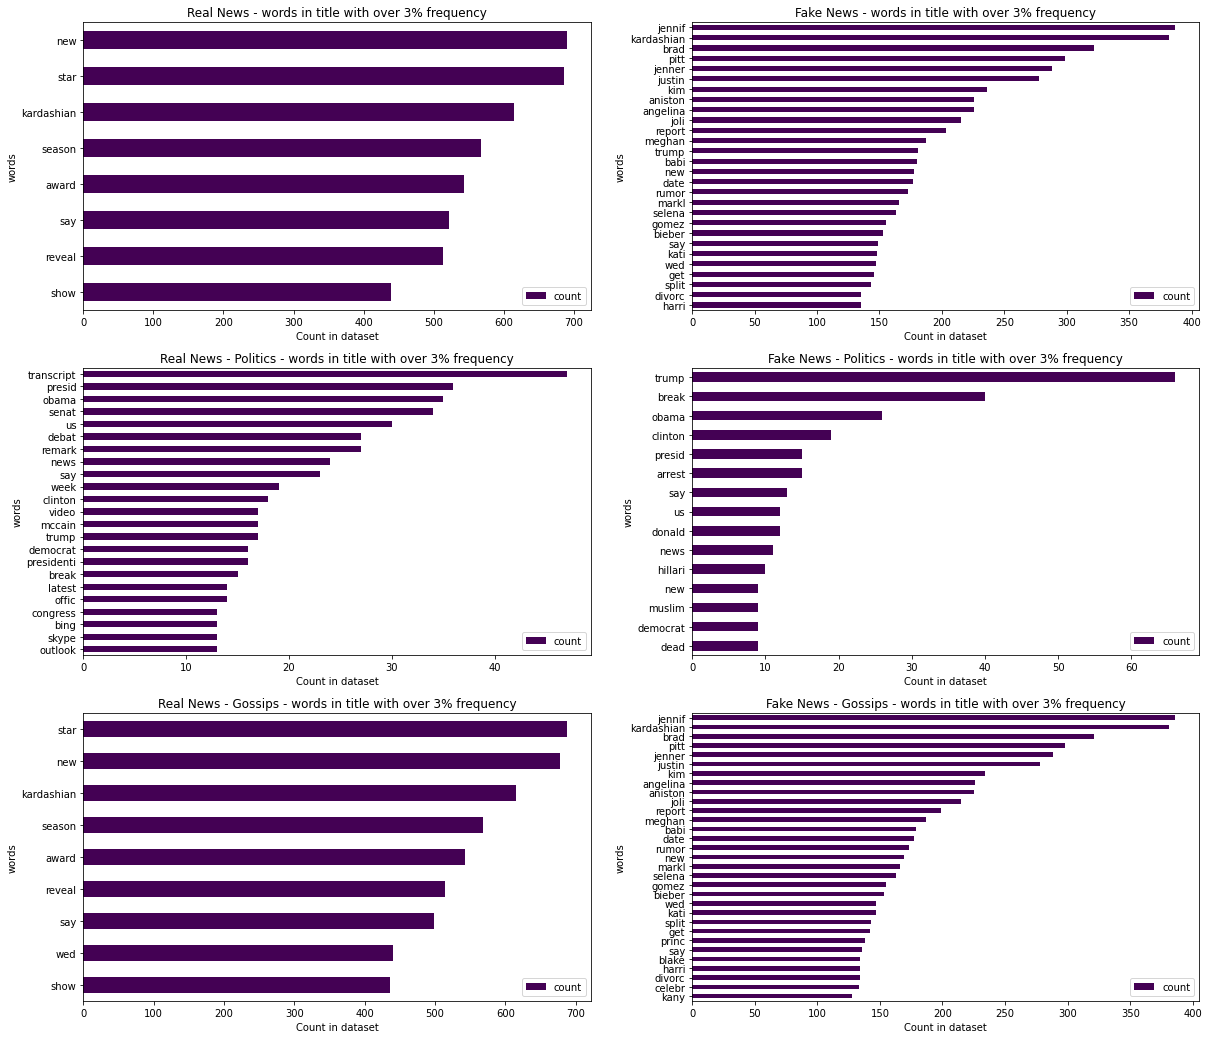

In [ ]:
# visualization
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))

axes[0,0].title.set_text('Real News - words in title with over 3% frequency')
axes[0,1].title.set_text('Fake News - words in title with over 3% frequency')
axes[1,0].title.set_text('Real News - Politics - words in title with over 3% frequency')
axes[1,1].title.set_text('Fake News - Politics - words in title with over 3% frequency')
axes[2,0].title.set_text('Real News - Gossips - words in title with over 3% frequency')
axes[2,1].title.set_text('Fake News - Gossips - words in title with over 3% frequency')

axes[0,0].set_ylabel('words in title')
axes[0,1].set_ylabel('words in title')
axes[1,0].set_ylabel('words in title')
axes[1,1].set_ylabel('words in title')
axes[2,0].set_ylabel('words in title')
axes[2,1].set_ylabel('words in title')

axes[0,0].set_xlabel('Count in dataset')
axes[0,1].set_xlabel('Count in dataset')
axes[1,0].set_xlabel('Count in dataset')
axes[1,1].set_xlabel('Count in dataset')
axes[2,0].set_xlabel('Count in dataset')
axes[2,1].set_xlabel('Count in dataset')

real_title.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis' , ax=axes[0,0])
fake_title.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis', ax=axes[0,1])

real_title_pol.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis' , ax=axes[1,0])
fake_title_pol.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis', ax=axes[1,1])

real_title_gos.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis' , ax=axes[2,0])
fake_title_gos.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis', ax=axes[2,1])


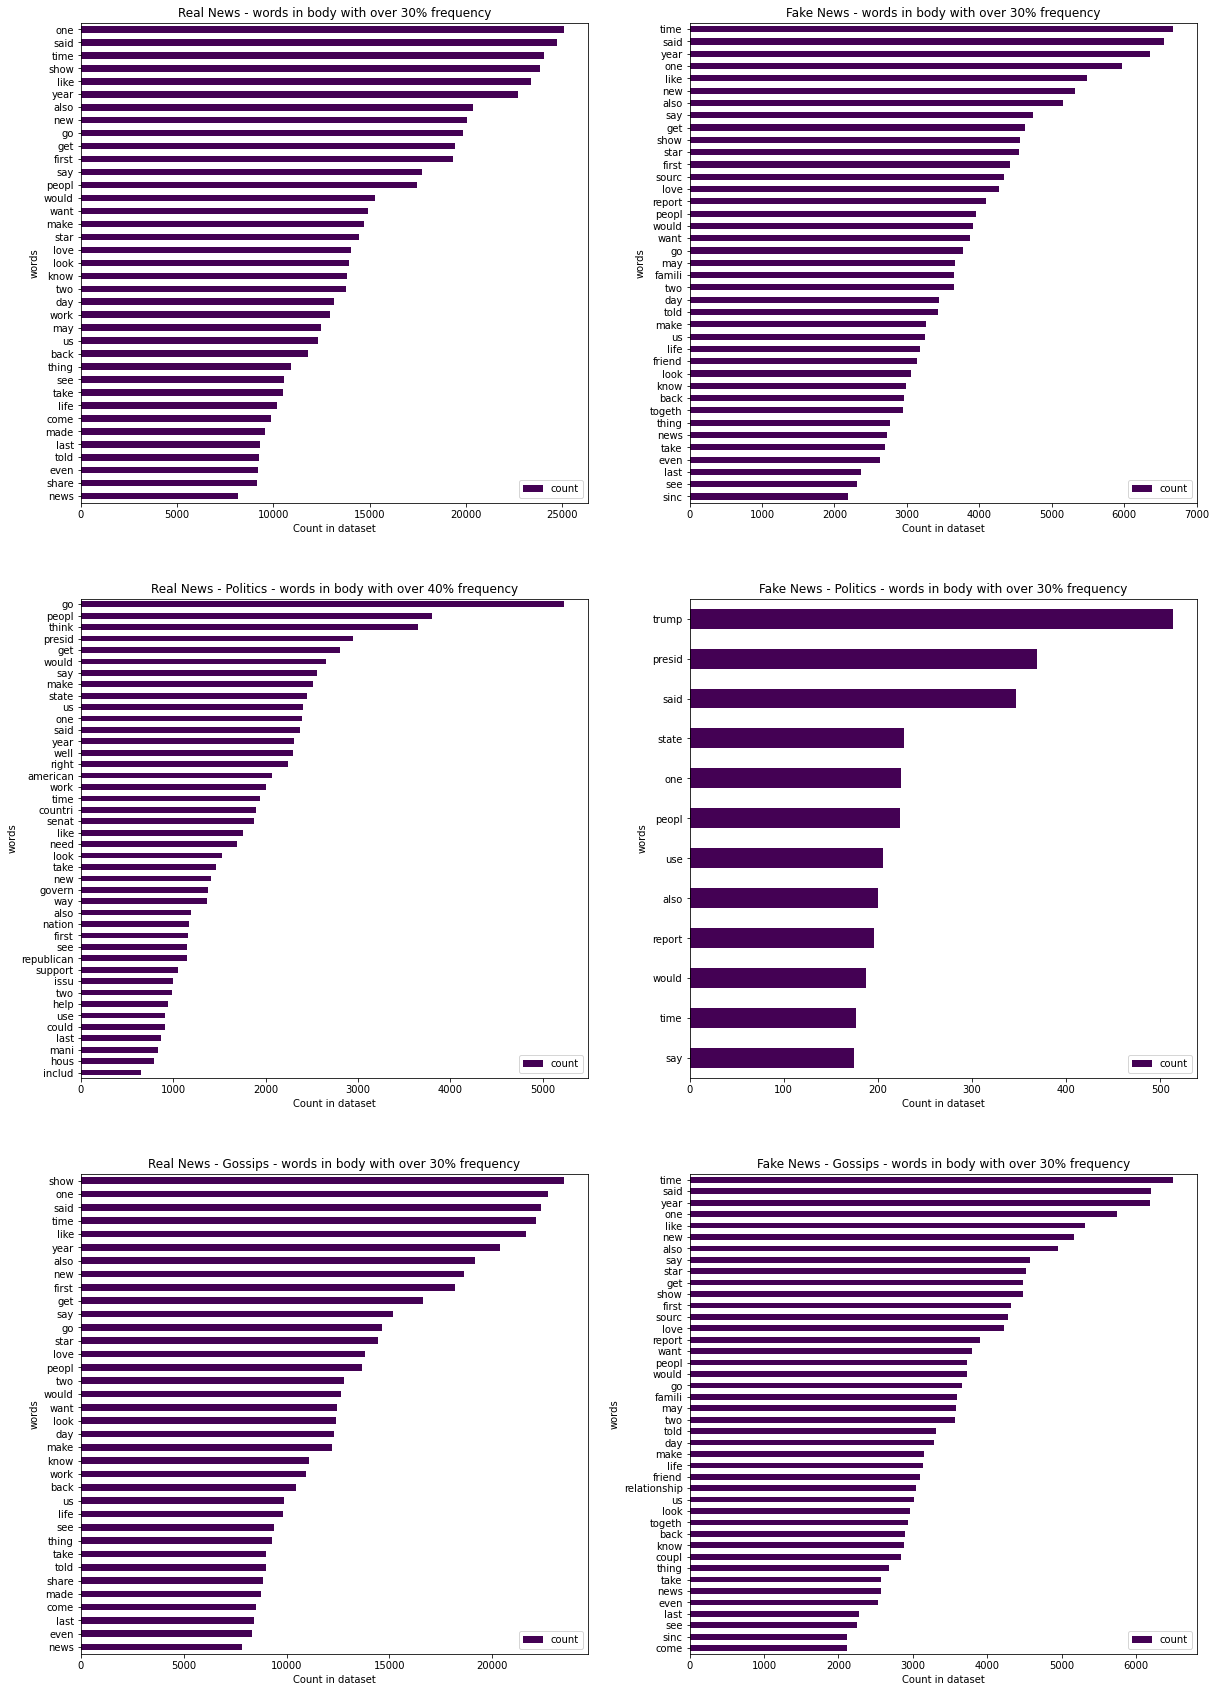

In [ ]:
# visualization
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30))

axes[0,0].title.set_text('Real News - words in body with over 30% frequency')
axes[0,1].title.set_text('Fake News - words in body with over 30% frequency')
axes[1,0].title.set_text('Real News - Politics - words in body with over 40% frequency')
axes[1,1].title.set_text('Fake News - Politics - words in body with over 30% frequency')
axes[2,0].title.set_text('Real News - Gossips - words in body with over 30% frequency')
axes[2,1].title.set_text('Fake News - Gossips - words in body with over 30% frequency')

axes[0,0].set_ylabel('words in body')
axes[0,1].set_ylabel('words in body')
axes[1,0].set_ylabel('words in body')
axes[1,1].set_ylabel('words in body')
axes[2,0].set_ylabel('words in body')
axes[2,1].set_ylabel('words in body')

axes[0,0].set_xlabel('Count in dataset')
axes[0,1].set_xlabel('Count in dataset')
axes[1,0].set_xlabel('Count in dataset')
axes[1,1].set_xlabel('Count in dataset')
axes[2,0].set_xlabel('Count in dataset')
axes[2,1].set_xlabel('Count in dataset')

real_body.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis' , ax=axes[0,0])
fake_body.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis', ax=axes[0,1])

real_body_pol.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis' , ax=axes[1,0])
fake_body_pol.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count', cmap = 'viridis', ax=axes[1,1])

real_body_gos.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count',  cmap = 'viridis' , ax=axes[2,0])
fake_body_gos.sort_values(by= 'count',ascending=True).plot.barh(x ='words', y='count',  cmap = 'viridis', ax=axes[2,1])

#### Articles : preprocessing of the data

**Data Cleaning**



1.   We first **merged all the datasets**, by: 
*   adding a column **'target'** equals to 0 if the news is fake and to 1 if the news is real
*   adding a column **'source'** equal to 'gossipcop' or 'politifact' (depending of the dataset the news come from) and creating a distinct 'id' with the news id

2.   For the column **'tweets'** : we splitted the 'tweets' column into a list of 'tweets': the tweets where only separated by '\t' and were merge into a single string. We also added a column with the number of tweets for each news


```
df['tweet_ids'] = df['tweet_ids'].astype(str)
df['tweet_ids'] = df['tweet_ids'].apply(lambda x: str(x).replace('\t',' '))
df['tweet_ids'] = df['tweet_ids'].apply(lambda x: re.split(r' ', x))
```



3. For the column **'news_url'**: we added the string 'http://' at the beginning of the url which were missing this part



```
df['news_url']=df['news_url'].apply(lambda x: 'http://'+str(x) if str(x)[0:4]!='http' else x)
```



4. We created a new column **'source_url'**: in which we try to get the source of the news (New York Times, Variety, DailyMail etc.) with the url link. We used the string from the url to get the information, but the outcome is not perfect

```
# df2["source_url"] = df2['news_url'].apply(lambda x: x.split("/")[2].replace("www.","").replace("web.","").replace("select.","").split(".")[0])
```





**Web scrapping part**

We used the packages **newspaper3k** and **nltk** to scrap the articles' data on the internet.

The goal was to get the text (**'body'**) and the publish date (**'date'**) of the articles. We tried to get the 'keywords' but it did not work, there were all returned as *NaN*.


```
import newspaper
from newspaper import Article
import sys as sys
import pandas as pd

body=[]
date=[]

for link in tqdm(df['news_url']): 
  try:
    article = Article(url= link)
    article.download()
    article.parse()
    successful = True
  except:
    successful = False
  if successful:
    body.append(article.text)
    date.append(article.publish_date)
  else: 
    body.append('error')
    date.append('error')
```



 

1.   We deleted the rows in which the **'body'** was returned as NaN. Indeed,when we cliked on such urls, the page did not exist anymore. They were representing 18% of the articles (4,193 rows out of 23,196)


2.   There was 1 dupplicated element (same article but different **'target'** column), and therefore we deleted it


3.  We transformed the timestamp of **'publish_date'** to a date from *datetime.datetime*
